In [ ]:
# Using scikit learn to perform multivariate linear regression 
#(c) Sai Shibu N B
#V1.0 Built: 2018-04-18

In [96]:
#importing required python Libraries
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D


In [150]:
#Path for data set (varies according to OS. Used MacOS High Sierra in this built)
path="ML/ex1data2.txt"
#loading the dataset to 'home' as data frame
home = pd.read_csv(path,header=None,names=['rsize','rooms','price'])
#applying Normalisation to dataset
home=home.apply(lambda home: (home - np.min(home)) / (np.max(home) - np.min(home)))

In [151]:
#adding X0 as 1s
home.insert(0, 'Ones', 1)
home.head()

,Ones,rsize,rooms,price
0,1,0.345284,0.50,0.433962
1,1,0.206288,0.50,0.301887
2,1,0.426917,0.50,0.375660
3,1,0.155543,0.25,0.117170
4,1,0.592388,0.75,0.698113


In [152]:
#Slicing X(features) and Y(outcomes)
cols = home.shape[1]
X=home.iloc[:,0:cols-1]
y = home.iloc[:,cols-1:cols]

In [153]:
#regr is the sklearn linear regression model
regr = linear_model.LinearRegression()

In [154]:
#Model holds linear regression results post fitting
model=regr.fit(X,y)

In [155]:
#Predicted outcome from the training dataset
y_pred=regr.predict(X)
#print(y_pred)

In [156]:
#Our predicted outcome score
regr.score(X,y)

0.7329450180289143

In [214]:
#Error between actual outcome and predicted outcome
error=mean_squared_error(y,y_pred)
print (error)

0.014548095767909061


In [188]:
#creating x,y&z axis
x = np.linspace(home.rsize.min(), home.rsize.max())
Y = np.linspace(home.rooms.min(), home.rooms.max())
z= np.linspace(home.price.min(), home.price.max())

Text(0.5,1,'Predicted cost vs size and no of rooms')

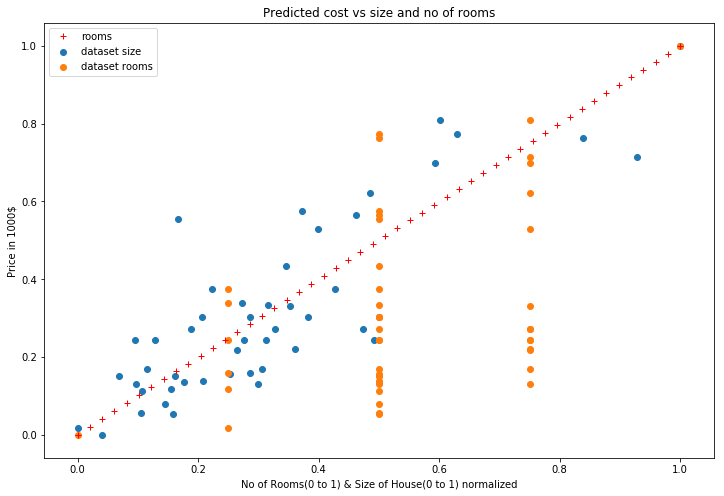

In [196]:
#Plotting the predicted outcome along with actual dataset
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(home.rsize,home.price,label='dataset size')
ax.scatter(home.rooms,home.price,label='dataset rooms')
ax.plot(x,z,'+r',label='rooms')
#ax.scatter(y_pred,y,label="Predicted outcome")
ax.legend(loc=2)
ax.set_ylabel('No of Rooms(0 to 1) & Size of House(0 to 1) normalized')
ax.set_xlabel('Price in 1000$')
ax.set_title('Predicted cost vs size and no of rooms')

Text(0.5,1,'Predicted cost vs actual cost ')

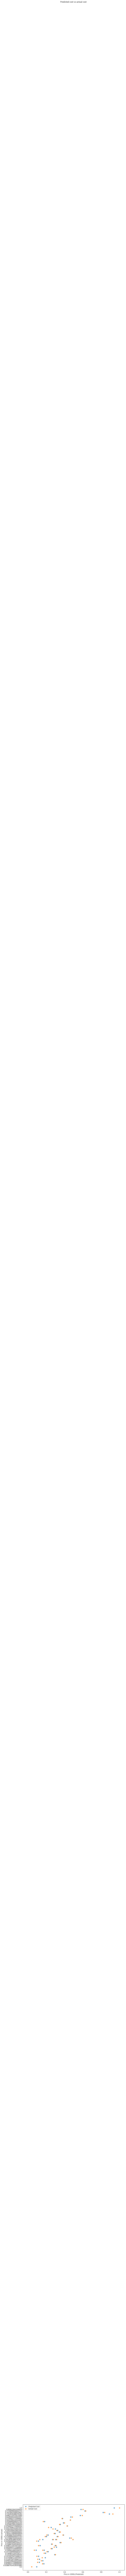

Text(0.5,1,'#3d Contour plot for cost function  ')

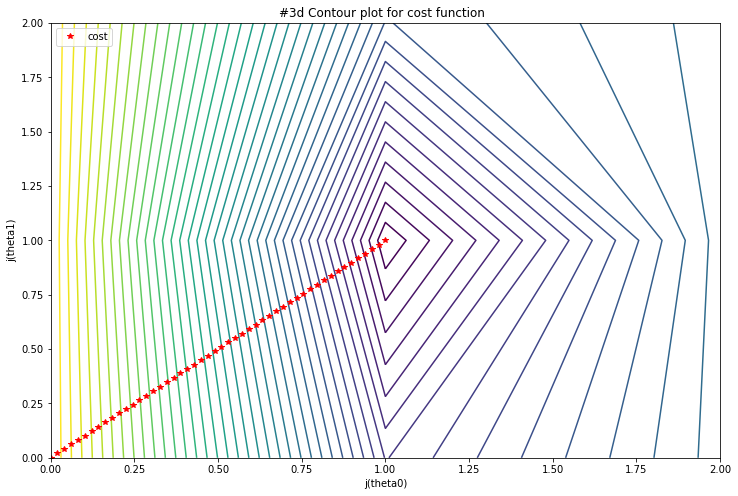